Saved Chart 1 to: ../images\interest_rate_vs_layoffs.png


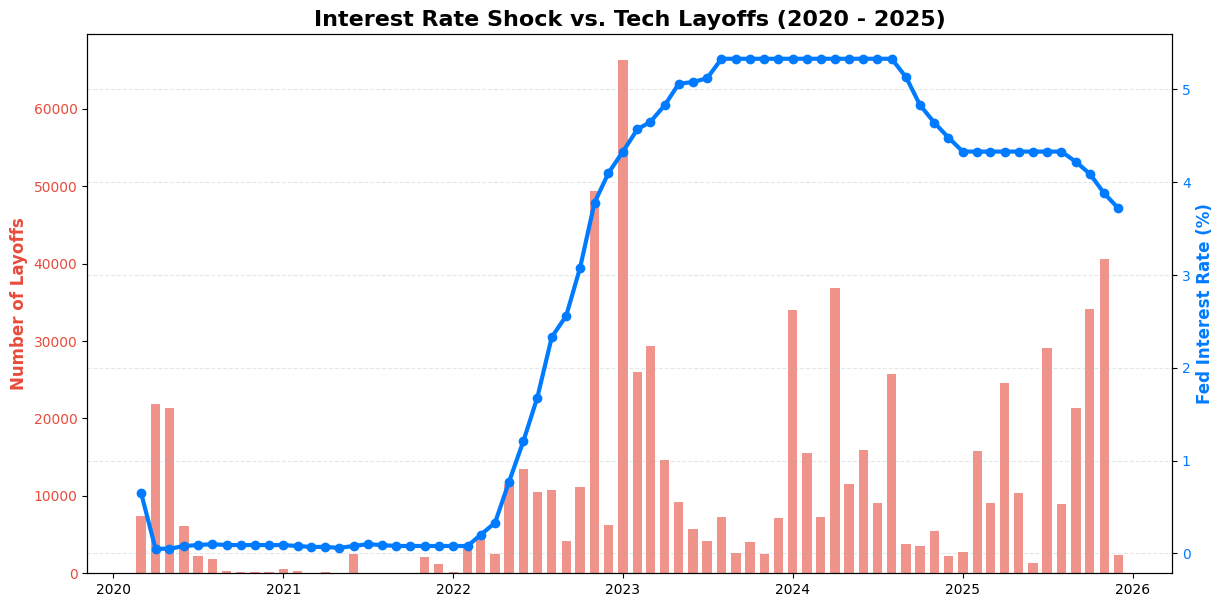

Running SQL Query...
                        industry  total_layoffs
0                       Consumer        65642.0
1                         Retail        62190.0
2                       Hardware        60842.0
3                          Other        57891.0
4           Software Development        43634.0
5                 Transportation        42980.0
6                        Finance        42857.0
7                           Food        39006.0
8                     E-commerce        30874.0
9  IT Services and IT Consulting        22066.0


C:\Users\Thien An Nguyen\AppData\Local\Temp\ipykernel_20208\3369896606.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_industries_sql, x='total_layoffs', y='industry', palette='viridis')


Saved Chart 2 to: ../images\top_industries_layoffs.png


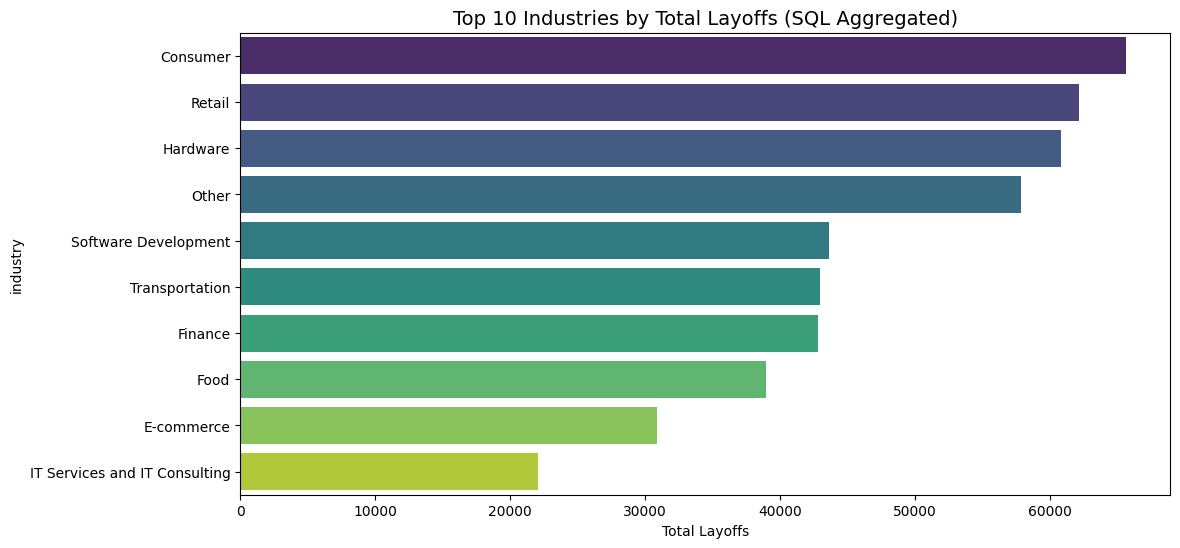

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

# --- 1. Data Preparation ---
# Define output directory for images
output_dir = '../images'
os.makedirs(output_dir, exist_ok=True)

# Load datasets
df_layoff = pd.read_csv('../data/processed/tech_layoffs_clean.csv')
df_macro = pd.read_csv('../data/raw/macro_economics_data.csv')

# Convert date columns
df_layoff['date'] = pd.to_datetime(df_layoff['date'])

if 'Unnamed: 0' in df_macro.columns:
    df_macro = df_macro.rename(columns={'Unnamed: 0': 'date'})
df_macro['date'] = pd.to_datetime(df_macro['date'])

# Aggregate layoffs by month for the line chart
df_layoff_monthly = df_layoff.set_index('date').resample('MS')['laid_off_count'].sum().reset_index()

# Merge datasets
df_merged = pd.merge(df_layoff_monthly, df_macro, on='date', how='inner')

# --- 2. Chart 1: Macro Impact Visualization (Dual Axis) ---
plt.figure(figsize=(14, 7))
ax1 = plt.gca()

# Plot Layoffs (Bar chart)
color_layoff = '#e74c3c' # Red
ax1.bar(df_merged['date'], df_merged['laid_off_count'], color=color_layoff, alpha=0.6, width=20, label='Layoffs (Left)')
ax1.set_ylabel('Number of Layoffs', color=color_layoff, fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor=color_layoff)

# Plot Interest Rate (Line chart) - Blue
ax2 = ax1.twinx()
color_rate = '#007bff' # Professional Blue
ax2.plot(df_merged['date'], df_merged['Interest_Rate'], color=color_rate, linewidth=3, marker='o', label='Fed Interest Rate (Right)')
ax2.set_ylabel('Fed Interest Rate (%)', color=color_rate, fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor=color_rate)

plt.title('Interest Rate Shock vs. Tech Layoffs (2020 - 2025)', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3)

# SAVE FIGURE 1 
output_path_1 = os.path.join(output_dir, 'interest_rate_vs_layoffs.png')
plt.savefig(output_path_1, dpi=300, bbox_inches='tight')
print(f"Saved Chart 1 to: {output_path_1}")

plt.show()

# --- 3. Chart 2: Industry Analysis using SQL ---

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrame to the SQL database table named 'layoffs'
df_layoff.to_sql('layoffs', conn, index=False, if_exists='replace')

# Write SQL Query
sql_query = """
SELECT 
    industry, 
    SUM(laid_off_count) as total_layoffs
FROM layoffs
GROUP BY industry
ORDER BY total_layoffs DESC
LIMIT 10;
"""

# Execute query and load result back to Pandas
print("Running SQL Query...")
top_industries_sql = pd.read_sql(sql_query, conn)
print(top_industries_sql)

# Visualization based on SQL result
plt.figure(figsize=(12, 6))
sns.barplot(data=top_industries_sql, x='total_layoffs', y='industry', palette='viridis')
plt.title('Top 10 Industries by Total Layoffs (SQL Aggregated)', fontsize=14)
plt.xlabel('Total Layoffs')

# SAVE FIGURE 2 
output_path_2 = os.path.join(output_dir, 'top_industries_layoffs.png')
plt.savefig(output_path_2, dpi=300, bbox_inches='tight')
print(f"Saved Chart 2 to: {output_path_2}")

plt.show()

